# Aizarani N. et al. Human Liver (CEL-seq)

## Reference:    
[Aizarani N, Saviano A, Sagar, Mailly L et al. A human liver cell atlas reveals heterogeneity and epithelial progenitors. Nature 2019 Aug;572(7768):199-204.](https://www.ncbi.nlm.nih.gov/pubmed/31292543)

## GEO:    
https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE124395

In [2]:
%pylab inline

import warnings
warnings.filterwarnings("ignore")

from SCCAF import *

Populating the interactive namespace from numpy and matplotlib


# Read in data
download counts

In [2]:
cts = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE124nnn/GSE124395/suppl/GSE124395_Normalhumanlivercellatlasdata.txt.gz",\
                 sep='\t',index_col=0)

In [3]:
cts.head()

ASGR1_CD45_UNB_P4_5_14  ASGR1_CD45_UNB_P4_5_16  \
5_8S_rRNA                     0.0                     0.0   
5S_rRNA                       0.0                     0.0   
7SK                           0.0                     0.0   
A1BG                          0.0                     0.0   
A1BG-AS1                      0.0                     0.0   

           ASGR1_CD45_UNB_P4_5_19  ASGR1_CD45_UNB_P4_5_26  \
5_8S_rRNA                     0.0                     0.0   
5S_rRNA                       0.0                     0.0   
7SK                           0.0                     0.0   
A1BG                          0.0                     0.0   
A1BG-AS1                      0.0                     0.0   

           ASGR1_CD45_UNB_P4_5_27  ASGR1_CD45_UNB_P4_5_30  \
5_8S_rRNA                     0.0                     0.0   
5S_rRNA                       0.0                     0.0   
7SK                           0.0                     0.0   
A1BG                          0.0                     0.0   
A1BG-AS1                      0.0                     0.0   

           ASGR1_CD45_UNB_P4_5_35  ASGR1_CD45_UNB_P4_5_50  \
5_8S_rRNA                     0.0                     0.0   
5S_rRNA                       0.0                     0.0   
7SK                           0.0                     0.0   
A1BG                          0.0                     0.0   
A1BG-AS1                      0.0                     0.0   

           ASGR1_CD45_UNB_P4_5_51  ASGR1_CD45_UNB_P4_5_54  ...  \
5_8S_rRNA                     0.0                     0.0  ...   
5S_rRNA                       0.0                     0.0  ...   
7SK                           0.0                     0.0  ...   
A1BG                          0.0                     0.0  ...   
A1BG-AS1                      0.0                     0.0  ...   

           Trop2pos315_3_82  Trop2pos315_3_83  Trop2pos315_3_84  \
5_8S_rRNA               0.0               0.0               0.0   
5S_rRNA                 0.0               0.0               0.0   
7SK                     0.0               0.0               0.0   
A1BG                    0.0               0.0               0.0   
A1BG-AS1                0.0               0.0               0.0   

           Trop2pos315_3_86  Trop2pos315_3_88  Trop2pos315_3_89  \
5_8S_rRNA               0.0               0.0               0.0   
5S_rRNA                 0.0               0.0               0.0   
7SK                     0.0               0.0               0.0   
A1BG                    0.0               0.0               0.0   
A1BG-AS1                0.0               0.0               0.0   

           Trop2pos315_3_91  Trop2pos315_3_92  Trop2pos315_3_93  \
5_8S_rRNA               0.0               0.0               0.0   
5S_rRNA                 0.0               0.0               0.0   
7SK                     0.0               0.0               0.0   
A1BG                    0.0               0.0               0.0   
A1BG-AS1                0.0               0.0               0.0   

           Trop2pos315_3_96  
5_8S_rRNA               0.0  
5S_rRNA                 0.0  
7SK                     0.0  
A1BG                    0.0  
A1BG-AS1                0.0  

[5 rows x 12622 columns]

In [4]:
cts.shape

(33941, 12622)

In [5]:
obs = pd.read_csv("ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE124nnn/GSE124395/suppl/GSE124395_clusterpartition.txt.gz",\
                  sep=' ',index_col=0)

In [6]:
ad = sc.AnnData(scipy.sparse.csr_matrix(cts.values.T))
ad.obs_names = cts.columns
ad.var_names = cts.index
ad = ad[ad.obs_names.isin(obs.index),:]
ad.obs = obs.loc[ad.obs_names]

In [7]:
ad

AnnData object with n_obs × n_vars = 10372 × 33941 
    obs: 'sct@cpart'

In [3]:
ad.raw = sc.pp.log1p(ad,copy=True)

> the cluster-cell mapping is according to the Fig 1 of the paper: https://www.nature.com/articles/s41586-019-1373-2#Sec4

In [9]:
dd = {1:'NK/T',
 2:'Kupffer',
 3:'NK/T',
 4:'Cholangiocytes',
 5:'NK/T',
 6:'Kupffer',
 7:'Cholangiocytes',
 8:'B cell',
 9:'Endothelial',
 10:'Endothelial',
 11:'Hepatocytes',
 12:'NK/T',
 13:'Endothelial',
 14:'Hepatocytes',
 15:'Endothelial',
 16:'Others',
 17:'Hepatocytes',
 18:'NK/T',
 19:'Others',
 20:'Endothelial',
 21:'Stellate',
 22:'B cell',
 23:'Kupffer',
 24:'Cholangiocytes',
 25:'Kupffer',
 26:'Endothelial',
 27:'Others',
 28:'NK/T',
 29:'Endothelial',
 30:'Hepatocytes',
 31:'Kupffer',
 32:'Endothelial',
 33:'Stellate',
 34:'B cell',
 35:'Endothelial',
 36:'Others',
 37:'B cell',
 38:'B cell',
 39:'Cholangiocytes',}

In [10]:
ad.obs['cell'] = ad.obs['sct@cpart'].astype(int).map(dd)

In [4]:
ad.write("../write/Aizarani2019Liver.h5")

# Batch Regression

In [2]:
ad = sc.read("../write/Aizarani2019Liver.h5")

In [3]:
ad.obs['batch'] = ad.obs_names.str.split('_').str[:-2].str.join('_')

In [4]:
sc.pp.filter_cells(ad, min_genes=200)
sc.pp.filter_genes(ad, min_cells=3)
sc.pp.filter_genes(ad, min_cells=20)

In [5]:
ad.obs['n_counts'] = ad.X.sum(axis=1)
ad.obs['n_genes'] = (ad.X>0).sum(axis=1)
# ad.var_names_make_unique()

In [6]:
sc.pp.normalize_per_cell(ad, counts_per_cell_after=1e4)
sc.pp.log1p(ad)

In [7]:
ad.obs['batch'] = ad.obs['batch'].astype(str)

In [8]:
ad.write("../write/Aizarani2019Liver_before.h5")

... storing 'batch' as categorical


In [9]:
ad = sc.read("../write/Aizarani2019Liver_before.h5")

In [11]:
ad.obs

sct@cpart            cell              batch  n_genes  \
index                                                                           
ASGR1_CD45_UNB_P4_5_16          1            NK/T  ASGR1_CD45_UNB_P4     1274   
ASGR1_CD45_UNB_P4_5_19          1            NK/T  ASGR1_CD45_UNB_P4     1367   
ASGR1_CD45_UNB_P4_5_26          2         Kupffer  ASGR1_CD45_UNB_P4     1643   
ASGR1_CD45_UNB_P4_5_27          3            NK/T  ASGR1_CD45_UNB_P4     1196   
ASGR1_CD45_UNB_P4_5_30          4  Cholangiocytes  ASGR1_CD45_UNB_P4     3305   
...                           ...             ...                ...      ...   
Trop2pos315_3_82                7  Cholangiocytes        Trop2pos315     2702   
Trop2pos315_3_83                4  Cholangiocytes        Trop2pos315     4101   
Trop2pos315_3_89               17     Hepatocytes        Trop2pos315     1484   
Trop2pos315_3_92                4  Cholangiocytes        Trop2pos315     2951   
Trop2pos315_3_96                7  Cholangiocytes        Trop2pos315     2284   

                           n_counts  
index                                
ASGR1_CD45_UNB_P4_5_16  2399.647949  
ASGR1_CD45_UNB_P4_5_19  2701.333496  
ASGR1_CD45_UNB_P4_5_26  3590.557617  
ASGR1_CD45_UNB_P4_5_27  2294.620850  
ASGR1_CD45_UNB_P4_5_30  7769.758789  
...                             ...  
Trop2pos315_3_82        4996.402344  
Trop2pos315_3_83        9771.392578  
Trop2pos315_3_89        3139.092285  
Trop2pos315_3_92        6066.218750  
Trop2pos315_3_96        4237.453125  

[10368 rows x 5 columns]

In [15]:
# sc.pp.scale(ad, max_value=10)
import NaiveDE
ad.obs['np.log1p(n_counts)'] = np.log1p(ad.obs['n_counts'])
res = NaiveDE.regress_out(ad.obs, ad.X.T.todense(), 'np.log1p(n_counts)+C(batch)', 'C(cell)',  rcond=1e-4).T

ad.obsm['X_pca'] = sc.tl.pca(res)

In [16]:
sc.tl.tsne(ad, n_pcs=50)
sc.pp.neighbors(ad, n_pcs=50)
sc.tl.umap(ad)
sc.tl.louvain(ad, resolution=0.5)

In [17]:
ad.obs['sct@cpart'] = ad.obs['sct@cpart'].astype(str)

In [18]:
ad.uns['cell_colors'] = default_20

... storing 'sct@cpart' as categorical


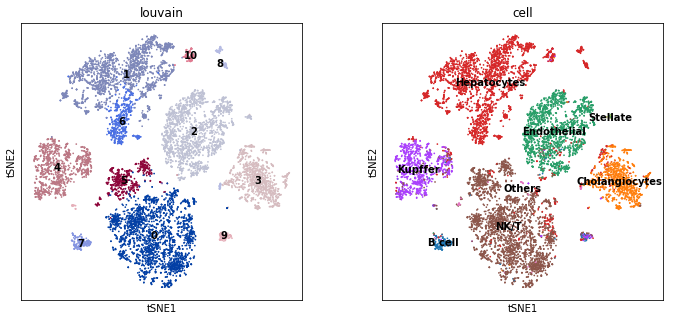

In [19]:
figsize(5,5)
sc.pl.tsne(ad, color=['louvain','cell'], legend_loc='on data')

In [20]:
ad.write("../write/Aizarani2019Liver_reg.h5")

# SCCAF

In [3]:
ad = sc.read("../write/Aizarani2019Liver_reg.h5")

In [4]:
ad.obs['cell'].value_counts()

Hepatocytes       3086
NK/T              3066
Endothelial       1830
Kupffer           1050
Cholangiocytes    1022
B cell             223
Stellate            28
Name: cell, dtype: int64

In [21]:
ad = ad[~ad.obs['cell'].isin(['Others']),:]

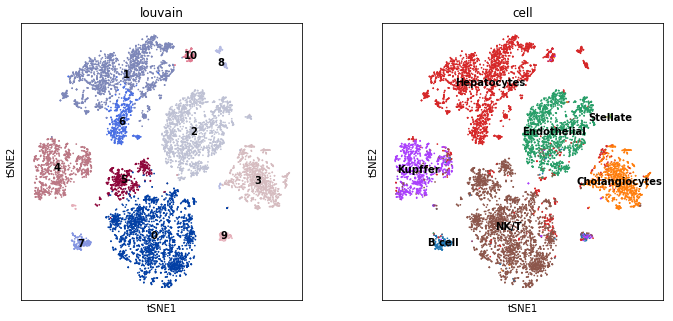

In [22]:
figsize(5,5)
sc.pl.tsne(ad, color=['louvain','cell'], legend_loc='on data')

In [23]:
sc.pp.neighbors(ad, n_pcs=50)

sc.tl.louvain(ad, resolution=0.3, key_added='louvain_r0.3')
sc.tl.louvain(ad, resolution=0.05, key_added='louvain_r0.05')
sc.tl.louvain(ad, resolution=1.5, key_added='louvain_r1.5')
sc.tl.louvain(ad, resolution=2.0, key_added='louvain_r2.0')
sc.tl.louvain(ad, resolution=2.5, key_added='louvain_r2.5')

In [32]:
sc.tl.louvain(ad, resolution=0.1, key_added='louvain_r0.1')

In [34]:
sc.tl.louvain(ad, resolution=1, key_added='louvain_r1')

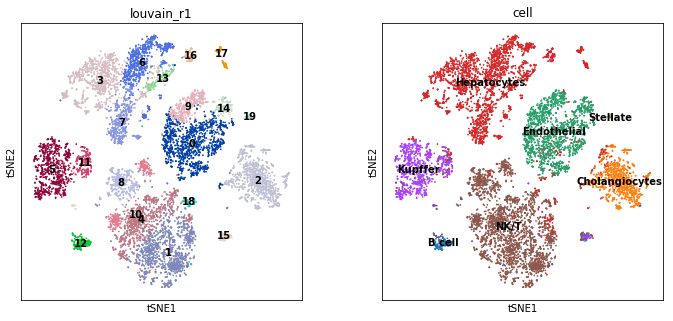

In [35]:
sc.pl.tsne(ad, color=['louvain_r1','cell'], legend_loc='on data')

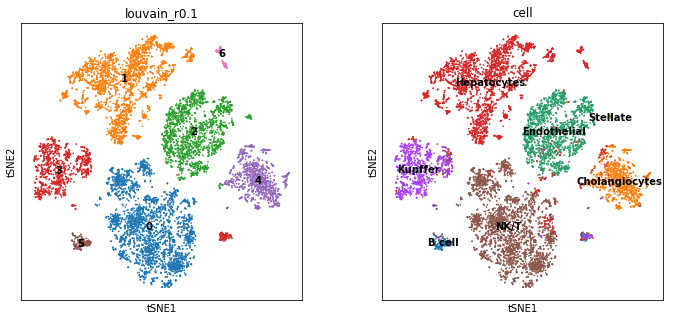

In [33]:
sc.pl.tsne(ad, color=['louvain_r0.1','cell'], legend_loc='on data')

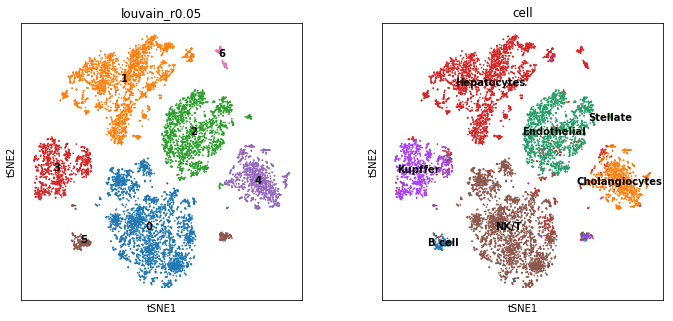

In [37]:
sc.pl.tsne(ad, color=['louvain_r0.05','cell'], legend_loc='on data')

In [1]:
ls

ARI_Aizarani.pdf
ARI_Hrvatin.pdf
ARI_Tasic2018.pdf
figures/
[GroundTruth]HEMATO_Giladi_2018.ipynb
[GroundTruth]HEMATO_Tsui_2018.ipynb
[GroundTruth]Human_Liver_Aizarani.ipynb
[GroundTruth]Human_Liver_Aizarani_SCCAF.ipynb
[GroundTruth]Human_Liver_MacParland.ipynb
[GroundTruth]Human_Pancreas_Lawlor.ipynb
[GroundTruth]Human_Pancreas_Muraro.ipynb
[GroundTruth]Human_Pancreas_Segerstolpe.ipynb
[GroundTruth]Human_Pancreas_Xin_2016.ipynb
[GroundTruth]Mouse_Cortex_Hrvatin.ipynb
[GroundTruth]Mouse_Cortex_Tasic2016.ipynb
[GroundTruth]Mouse_Cortex_Tasic2018.ipynb
[GroundTruth]Mouse_Cortex_Zeisel_2015.ipynb
[GroundTruth]Mouse_Retina_Shekhar_R.ipynb
[GroundTruth]Pancreas_Baron.ipynb
[GroundTruth]Shekhar_Mouse_Retina.ipynb
Reference datasets.ipynb
[Unannotated]Human Brain (Allen Brain).ipynb
[Unannotated]Immune Cell Atlas.ipynb


In [36]:
ad.write("../write/Aizarani2019Liver_reg.h5")

In [29]:
ls -lh ../write/Aizarani2019Liver_reg.h5

-rw-r--r--  1 zmiao  384566875   276M  8 Oct 15:32 ../write/Aizarani2019Liver_reg.h5


In [9]:
ad.obs['L1_Round0'] = ad.obs['louvain_r1']

In [2]:
ad = sc.read("../write/Aizarani2019Liver_reg.h5")

R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.9419
Accuracy on the training set: 0.9745
Accuracy on the hold-out set: 0.9154


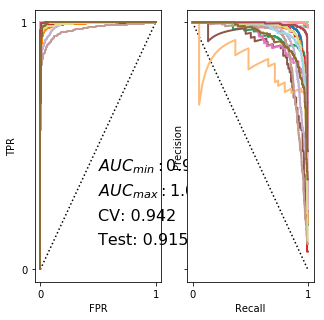

Accuracy on the training set: 0.9787
Accuracy on the hold-out set: 0.9229
Accuracy on the training set: 0.9745
Accuracy on the hold-out set: 0.9172
Max R1mat: 0.488636
Max R2mat: 0.012576
min_acc: 0.915390


<Figure size 360x360 with 0 Axes>

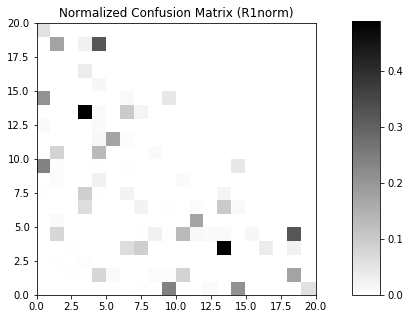

<Figure size 360x360 with 0 Axes>

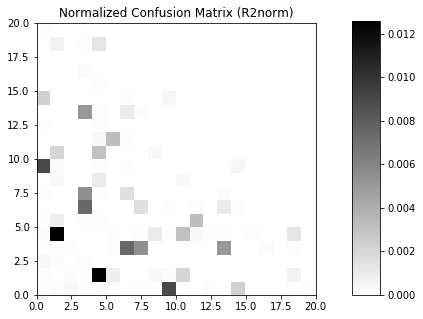

IGRAPH U-W- 20 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.488636
m2: 0.012576
Accuracy: 0.915390
R1norm_cutoff: 0.478636
R2norm_cutoff: 0.011576
Accuracy: 0.915390
Round1 ...
Mean CV accuracy: 0.9295
Accuracy on the training set: 0.9674
Accuracy on the hold-out set: 0.9201


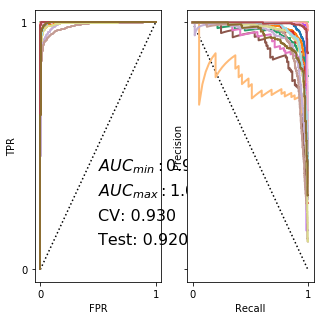

Accuracy on the training set: 0.9751
Accuracy on the hold-out set: 0.9155
Accuracy on the training set: 0.9739
Accuracy on the hold-out set: 0.9224
Max R1mat: 0.517647
Max R2mat: 0.012914
min_acc: 0.915506


<Figure size 360x360 with 0 Axes>

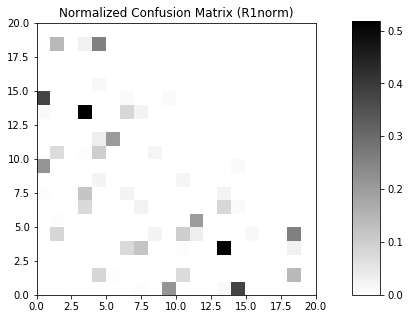

<Figure size 360x360 with 0 Axes>

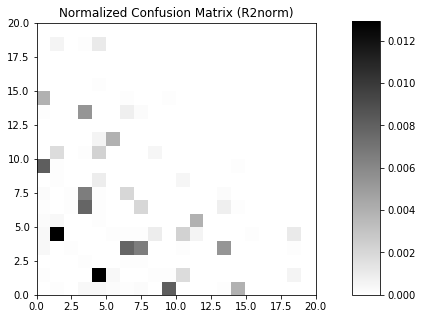

... storing 'L1_Round0_self-projection' as categorical
... storing 'L1_Round1' as categorical


IGRAPH U-W- 20 2 --
+ attr: weight (e)
+ edges:
3--13 3--13


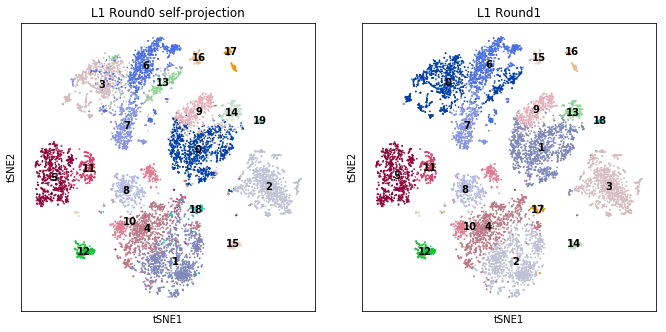

Round2 ...
Mean CV accuracy: 0.9456
Accuracy on the training set: 0.9806
Accuracy on the hold-out set: 0.9138


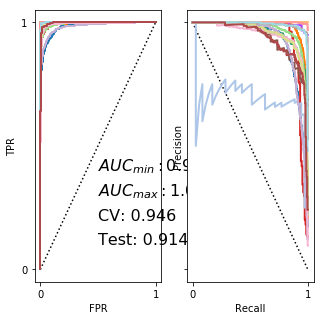

Accuracy on the training set: 0.9744
Accuracy on the hold-out set: 0.9161
Accuracy on the training set: 0.9794
Accuracy on the hold-out set: 0.9195
Max R1mat: 0.323529
Max R2mat: 0.014748
min_acc: 0.913833


<Figure size 360x360 with 0 Axes>

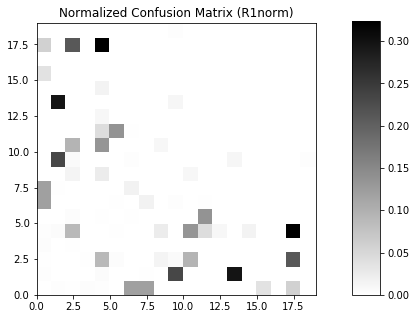

<Figure size 360x360 with 0 Axes>

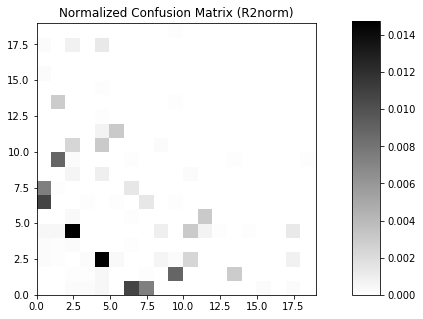

IGRAPH U-W- 19 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.323529
m2: 0.014748
Accuracy: 0.913833
start_iter: 1
R1norm_cutoff: 0.313529
R2norm_cutoff: 0.013748
Accuracy: 0.913833
Round2 ...
Mean CV accuracy: 0.9425
Accuracy on the training set: 0.9794
Accuracy on the hold-out set: 0.9156


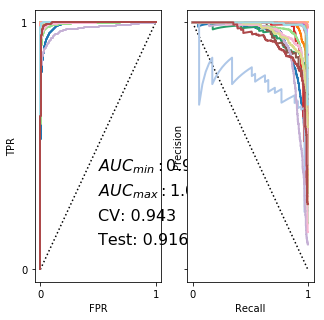

Accuracy on the training set: 0.9800
Accuracy on the hold-out set: 0.9167
Accuracy on the training set: 0.9806
Accuracy on the hold-out set: 0.9182
Max R1mat: 0.302326
Max R2mat: 0.013822
min_acc: 0.915556


<Figure size 360x360 with 0 Axes>

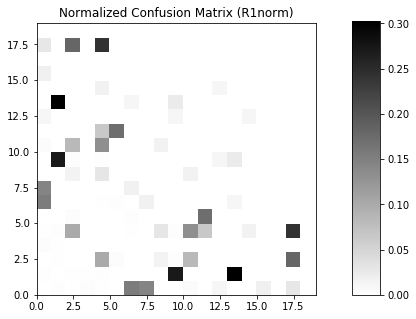

<Figure size 360x360 with 0 Axes>

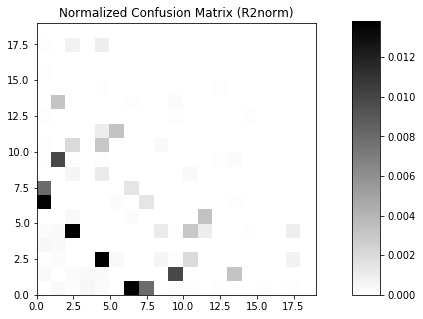

IGRAPH U-W- 19 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.302326
m2: 0.013822
Accuracy: 0.915556
start_iter: 1
R1norm_cutoff: 0.292326
R2norm_cutoff: 0.012822
Accuracy: 0.915556
Round2 ...
Mean CV accuracy: 0.9188
Accuracy on the training set: 0.9763
Accuracy on the hold-out set: 0.9272


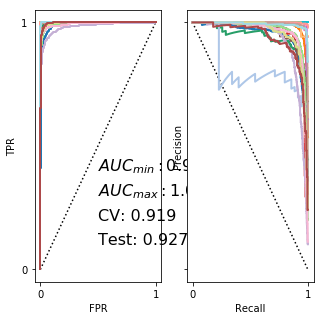

Accuracy on the training set: 0.9756
Accuracy on the hold-out set: 0.9166
Accuracy on the training set: 0.9794
Accuracy on the hold-out set: 0.9207
Max R1mat: 0.272727
Max R2mat: 0.011318
min_acc: 0.916590


<Figure size 360x360 with 0 Axes>

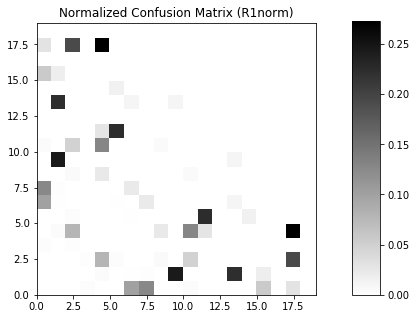

<Figure size 360x360 with 0 Axes>

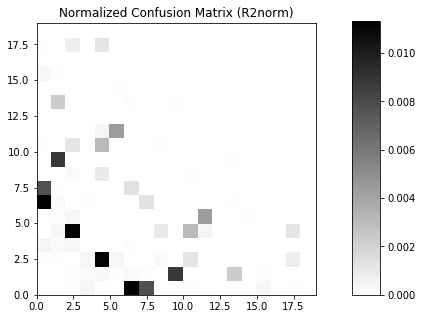

IGRAPH U-W- 19 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.272727
m2: 0.011318
Accuracy: 0.916590
start_iter: 1
R1norm_cutoff: 0.262727
R2norm_cutoff: 0.010318
Accuracy: 0.916590
Round2 ...
Mean CV accuracy: 0.9381
Accuracy on the training set: 0.9775
Accuracy on the hold-out set: 0.9172


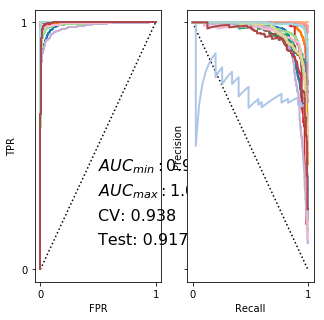

Accuracy on the training set: 0.9775
Accuracy on the hold-out set: 0.9176
Accuracy on the training set: 0.9750
Accuracy on the hold-out set: 0.9202
Max R1mat: 0.296429
Max R2mat: 0.012927
min_acc: 0.917165


<Figure size 360x360 with 0 Axes>

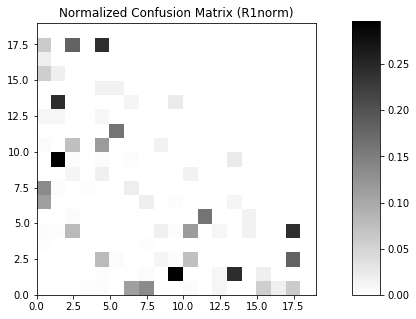

<Figure size 360x360 with 0 Axes>

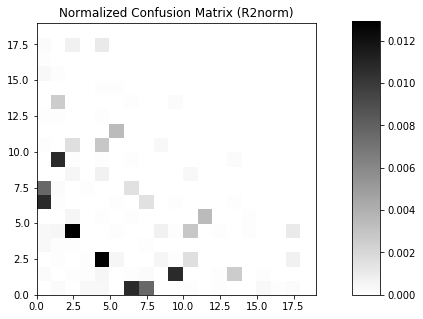

... storing 'L1_Round1_self-projection' as categorical
... storing 'L1_Round2' as categorical


IGRAPH U-W- 19 2 --
+ attr: weight (e)
+ edges:
1--9 1--9


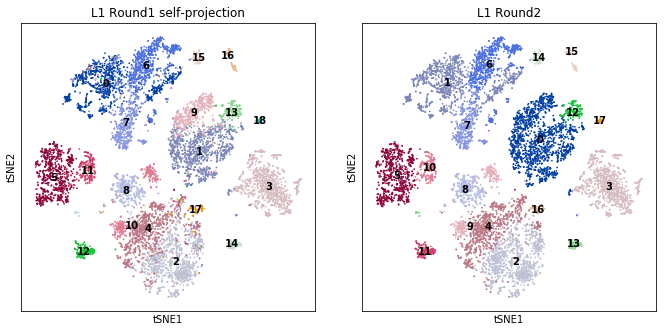

Round3 ...
Mean CV accuracy: 0.9399
Accuracy on the training set: 0.9780
Accuracy on the hold-out set: 0.9288


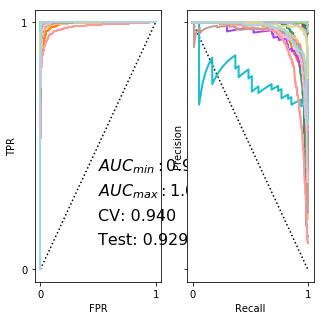

Accuracy on the training set: 0.9793
Accuracy on the hold-out set: 0.9254
Accuracy on the training set: 0.9820
Accuracy on the hold-out set: 0.9313
Max R1mat: 0.303030
Max R2mat: 0.012982
min_acc: 0.925375


<Figure size 360x360 with 0 Axes>

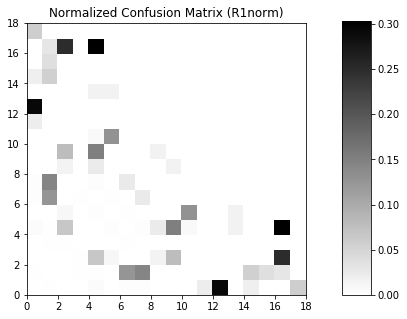

<Figure size 360x360 with 0 Axes>

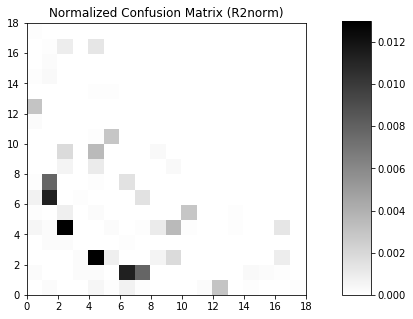

... storing 'L1_Round2_self-projection' as categorical
... storing 'L1_Round3' as categorical


IGRAPH U-W- 18 4 --
+ attr: weight (e)
+ edges:
0--12 4--16 0--12 4--16


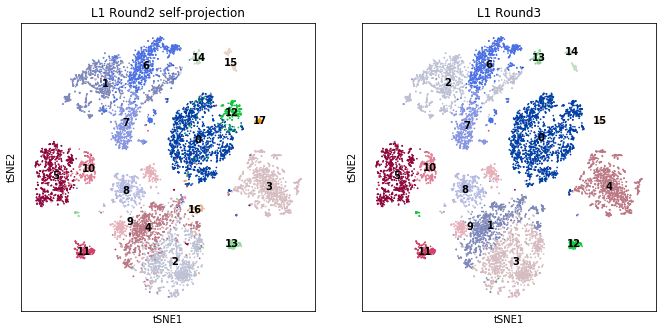

Round4 ...
Mean CV accuracy: 0.9362
Accuracy on the training set: 0.9746
Accuracy on the hold-out set: 0.9321


Accuracy on the training set: 0.9797
Accuracy on the hold-out set: 0.9338
Accuracy on the training set: 0.9811
Accuracy on the hold-out set: 0.9302
Max R1mat: 0.197183
Max R2mat: 0.012873
min_acc: 0.930204


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

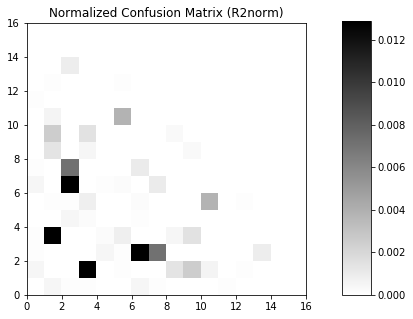

IGRAPH U-W- 16 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.197183
m2: 0.012873
Accuracy: 0.930204
start_iter: 3
R1norm_cutoff: 0.187183
R2norm_cutoff: 0.011873
Accuracy: 0.930204
Round4 ...
Mean CV accuracy: 0.9362
Accuracy on the training set: 0.9761
Accuracy on the hold-out set: 0.9330


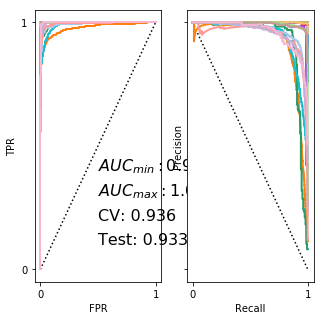

Accuracy on the training set: 0.9753
Accuracy on the hold-out set: 0.9370
Accuracy on the training set: 0.9811
Accuracy on the hold-out set: 0.9346
Max R1mat: 0.153266
Max R2mat: 0.016183
min_acc: 0.933005


<Figure size 360x360 with 0 Axes>

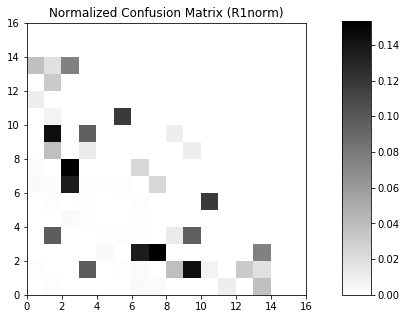

<Figure size 360x360 with 0 Axes>

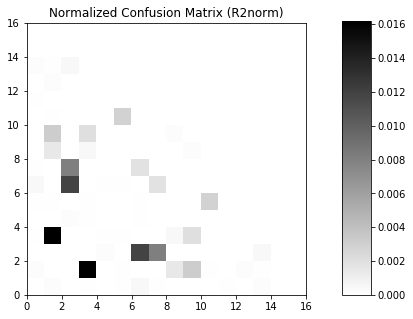

IGRAPH U-W- 16 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.153266
m2: 0.016183
Accuracy: 0.933005
start_iter: 3
R1norm_cutoff: 0.143266
R2norm_cutoff: 0.015183
Accuracy: 0.933005
Round4 ...
Mean CV accuracy: 0.9521
Accuracy on the training set: 0.9761
Accuracy on the hold-out set: 0.9360


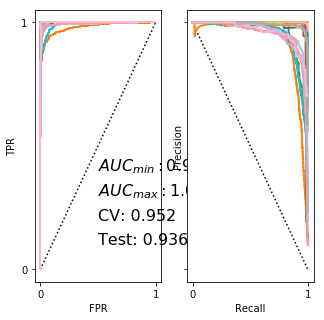

Accuracy on the training set: 0.9811
Accuracy on the hold-out set: 0.9352
Accuracy on the training set: 0.9753
Accuracy on the hold-out set: 0.9330
Max R1mat: 0.208633
Max R2mat: 0.015675
min_acc: 0.933005


<Figure size 360x360 with 0 Axes>

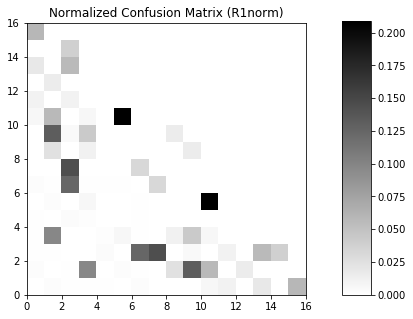

<Figure size 360x360 with 0 Axes>

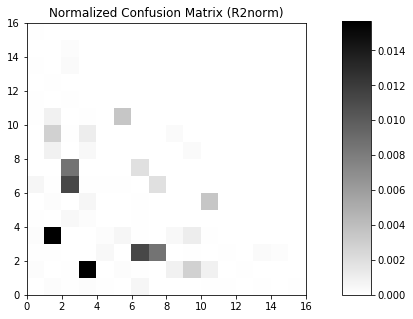

... storing 'L1_Round3_self-projection' as categorical
... storing 'L1_Round4' as categorical


IGRAPH U-W- 16 4 --
+ attr: weight (e)
+ edges:
2--7 5--10 2--7 5--10


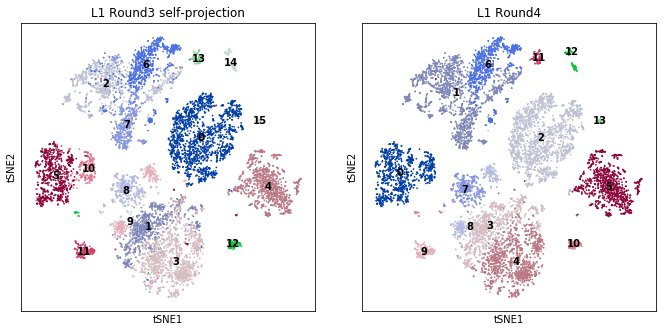

Round5 ...
Mean CV accuracy: 0.9551
Accuracy on the training set: 0.9847
Accuracy on the hold-out set: 0.9515


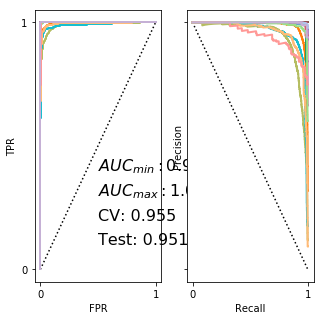

Accuracy on the training set: 0.9890
Accuracy on the hold-out set: 0.9475
Accuracy on the training set: 0.9839
Accuracy on the hold-out set: 0.9506
Max R1mat: 0.132472
Max R2mat: 0.016536
min_acc: 0.947513


<Figure size 360x360 with 0 Axes>

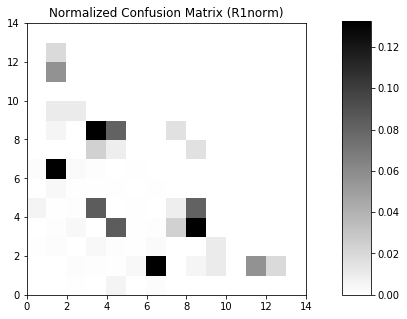

<Figure size 360x360 with 0 Axes>

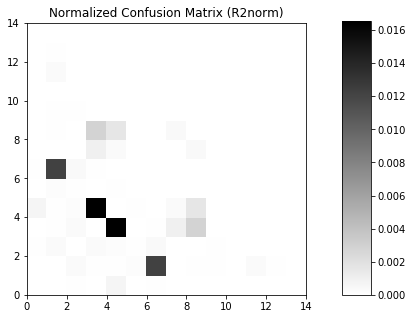

IGRAPH U-W- 14 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.132472
m2: 0.016536
Accuracy: 0.947513
start_iter: 4
R1norm_cutoff: 0.122472
R2norm_cutoff: 0.015536
Accuracy: 0.947513
Round5 ...
Mean CV accuracy: 0.9585
Accuracy on the training set: 0.9873
Accuracy on the hold-out set: 0.9499


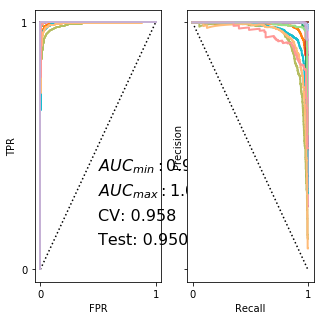

Accuracy on the training set: 0.9890
Accuracy on the hold-out set: 0.9513
Accuracy on the training set: 0.9830
Accuracy on the hold-out set: 0.9486
Max R1mat: 0.146497
Max R2mat: 0.017653
min_acc: 0.948608


<Figure size 360x360 with 0 Axes>

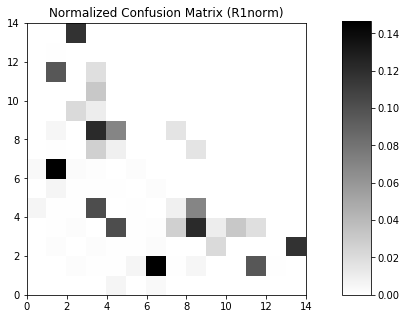

<Figure size 360x360 with 0 Axes>

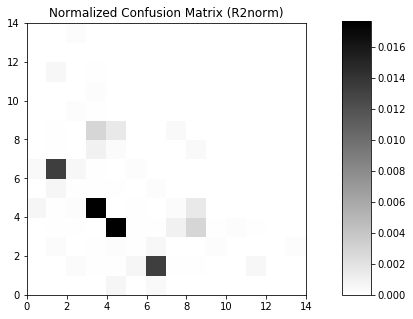

... storing 'L1_Round4_self-projection' as categorical
... storing 'L1_Round5' as categorical


IGRAPH U-W- 14 2 --
+ attr: weight (e)
+ edges:
1--6 1--6


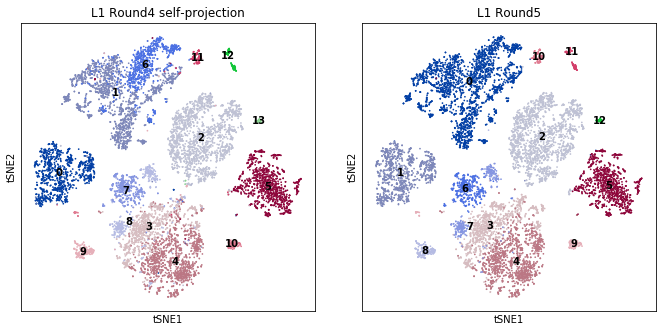

Round6 ...
Mean CV accuracy: 0.9686
Accuracy on the training set: 0.9861
Accuracy on the hold-out set: 0.9629


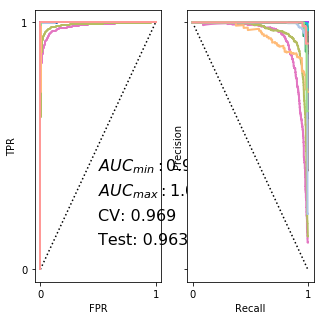

Accuracy on the training set: 0.9935
Accuracy on the hold-out set: 0.9625
Accuracy on the training set: 0.9889
Accuracy on the hold-out set: 0.9653
Max R1mat: 0.150943
Max R2mat: 0.016808
min_acc: 0.962497


<Figure size 360x360 with 0 Axes>

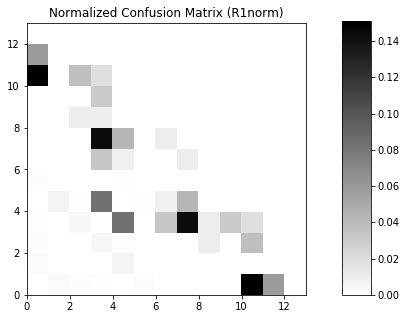

<Figure size 360x360 with 0 Axes>

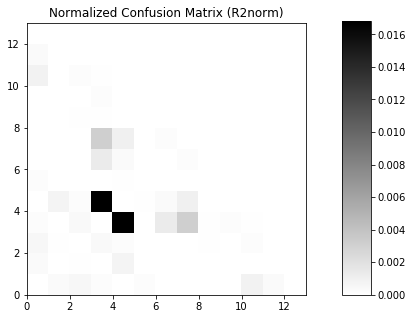

... storing 'L1_Round5_self-projection' as categorical
... storing 'L1_Round6' as categorical


IGRAPH U-W- 13 4 --
+ attr: weight (e)
+ edges:
0--10 3--7 3--7 0--10


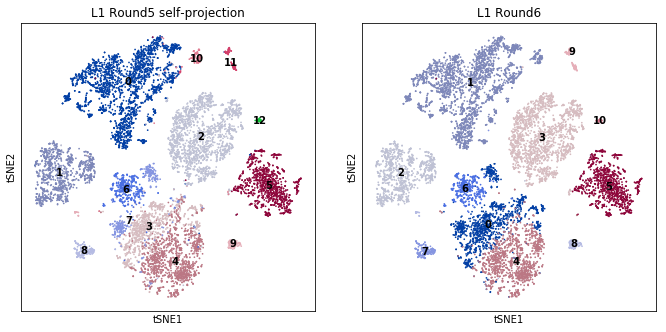

Round7 ...
Mean CV accuracy: 0.9784
Accuracy on the training set: 0.9914
Accuracy on the hold-out set: 0.9664


Accuracy on the training set: 0.9914
Accuracy on the hold-out set: 0.9683
Accuracy on the training set: 0.9903
Accuracy on the hold-out set: 0.9660
Max R1mat: 0.117647
Max R2mat: 0.019162
min_acc: 0.965991


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

IGRAPH U-W- 11 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.117647
m2: 0.019162
Accuracy: 0.965991
start_iter: 6
R1norm_cutoff: 0.107647
R2norm_cutoff: 0.018162
Accuracy: 0.965991
Round7 ...
Mean CV accuracy: 0.9697
Accuracy on the training set: 0.9881
Accuracy on the hold-out set: 0.9712


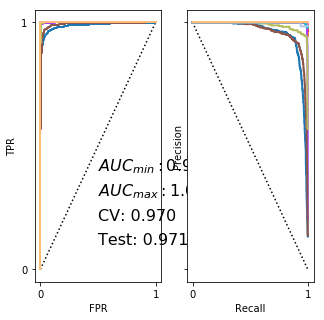

Accuracy on the training set: 0.9870
Accuracy on the hold-out set: 0.9664
Accuracy on the training set: 0.9892
Accuracy on the hold-out set: 0.9673
Max R1mat: 0.086031
Max R2mat: 0.016575
min_acc: 0.966418


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

IGRAPH U-W- 11 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.086031
m2: 0.016575
Accuracy: 0.966418
start_iter: 6
R1norm_cutoff: 0.076031
R2norm_cutoff: 0.015575
Accuracy: 0.966418
Round7 ...
Mean CV accuracy: 0.9741
Accuracy on the training set: 0.9881
Accuracy on the hold-out set: 0.9682


Accuracy on the training set: 0.9968
Accuracy on the hold-out set: 0.9658
Accuracy on the training set: 0.9914
Accuracy on the hold-out set: 0.9680
Max R1mat: 0.103608
Max R2mat: 0.018445
min_acc: 0.965778


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

... storing 'L1_Round6_self-projection' as categorical
... storing 'L1_Round7' as categorical


IGRAPH U-W- 11 2 --
+ attr: weight (e)
+ edges:
0--4 0--4


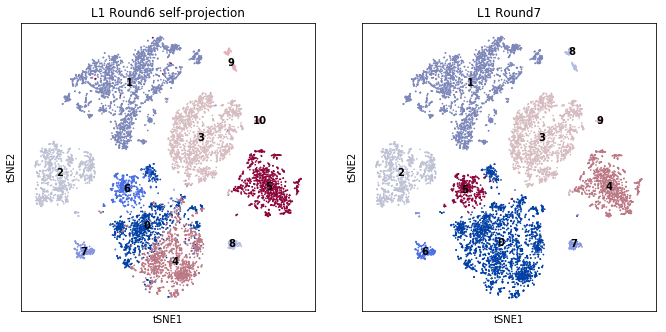

Round8 ...
Mean CV accuracy: 0.9867
Accuracy on the training set: 0.9988
Accuracy on the hold-out set: 0.9870


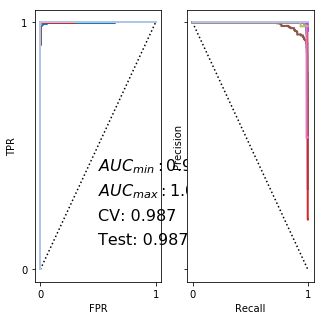

Accuracy on the training set: 0.9988
Accuracy on the hold-out set: 0.9893
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9846
Max R1mat: 0.075301
Max R2mat: 0.002982
min_acc: 0.984599


<Figure size 360x360 with 0 Axes>

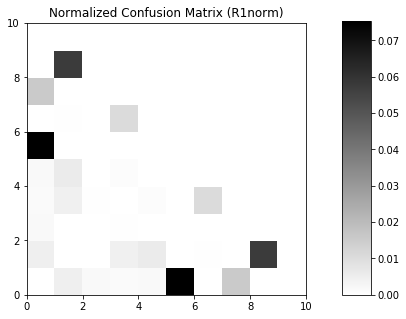

<Figure size 360x360 with 0 Axes>

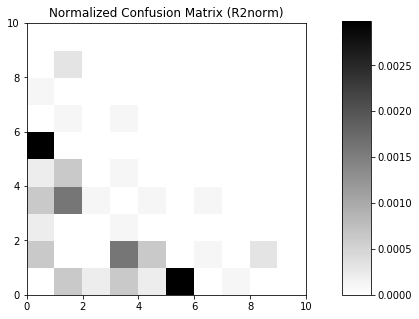

IGRAPH U-W- 10 0 --
+ attr: weight (e)
Converge SCCAF_optimize no. cluster!
m1: 0.075301
m2: 0.002982
Accuracy: 0.984599
CPU times: user 1min 39s, sys: 4min 17s, total: 5min 57s
Wall time: 54 s


In [80]:
%%time
figsize(5,5)
SCCAF_optimize_all(min_acc=0.988, start='louvain_r1',ad=ad, use='pca', basis ='tsne',low_res='louvain_r0.1',n=100)

In [81]:
ad.write("../write/Aizarani2019Liver_reg.h5")

... storing 'L1_Round7_self-projection' as categorical


In [1]:
ls ../reference/*Aizarani2019Liver*.csv

../reference/MacParland2018Liver_Aizarani2019Liver_ACTINN.csv
../reference/MacParland2018Liver_Aizarani2019Liver_CHETAH.csv
../reference/MacParland2018Liver_Aizarani2019Liver_LogisticRegression.csv
../reference/MacParland2018Liver_Aizarani2019Liver_moana.csv
../reference/MacParland2018Liver_Aizarani2019Liver_scClassify.csv
../reference/MacParland2018Liver_Aizarani2019Liver_singleCellNet.csv
../reference/MacParland2018Liver_Aizarani2019Liver_SingleR.csv


In [46]:
from glob import iglob
ad1 = sc.read("../write/Aizarani2019Liver.h5")
for f in iglob("../reference/*Aizarani2019Liver*.csv"):
    id = f.split("_")[-1].replace('.csv','')
    print(id)
    if id in ['moana','ACTINN','LogisticRegression']:
        df = pd.read_csv(f,index_col=0,header=None)
        x = df[1]
    else:
        df = pd.read_csv(f,index_col=0)
        x = df['x']
    x = x.iloc[:ad1.shape[0]]
    ad1.obs[id] = x.tolist()
    ad.obs[id] = ad1[ad.obs_names,:].obs[id]

singleCellNet
CHETAH
SingleR
moana
ACTINN
scClassify
LogisticRegression


In [53]:
for id in ['L1_result','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify','moana']:
    ad.uns['%s_colors'%id] = default_20

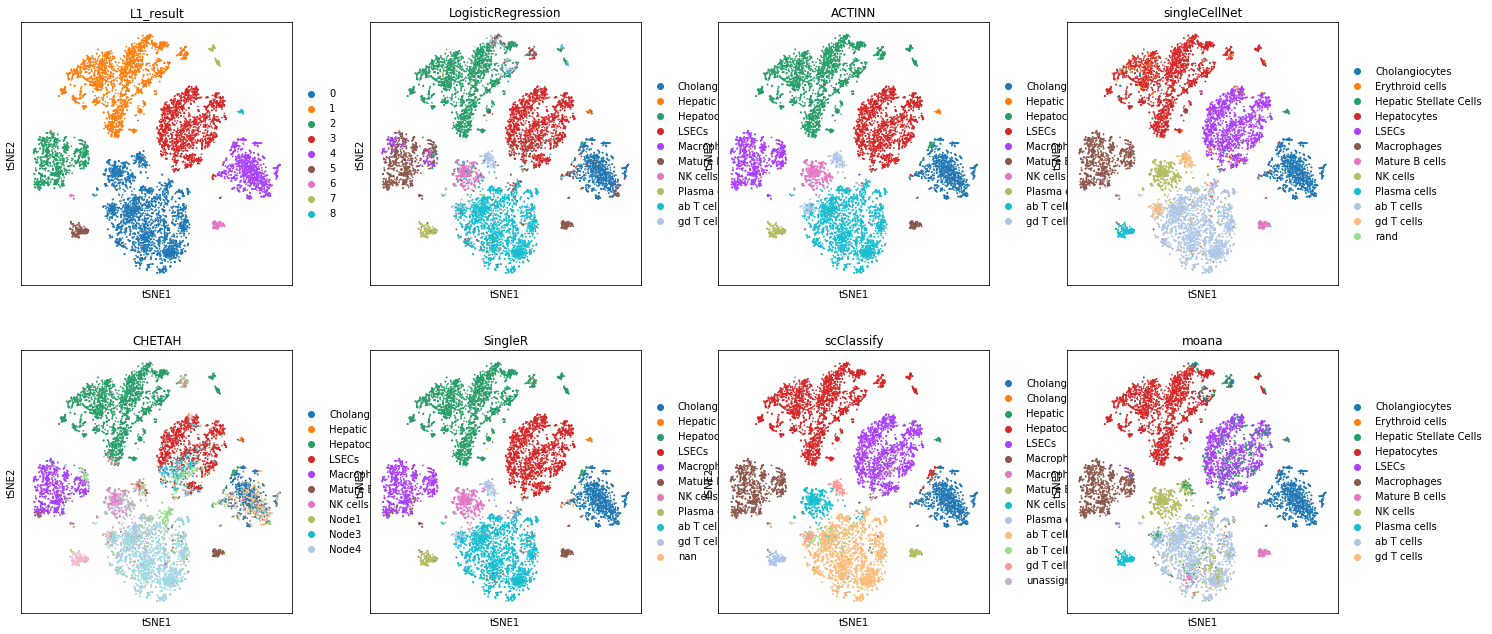

In [54]:
sc.pl.tsne(ad, color=['L1_result','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify','moana'])

In [36]:
ad.write("../write/Aizarani2019Liver_reg.h5")

In [2]:
ad = sc.read("../write/Aizarani2019Liver_reg.h5")

In [53]:
ad.obs['Published'] = ad.obs['cell']
ad.uns['Published_colors'] = ad.uns['cell_colors']

In [89]:
figsize(4,4)
sc.pl.tsne(ad, color=['Published','SCCAF','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify','moana'], ncols=3, frameon=False, legend_loc= '', hspace=0.1, wspace=0, save='_Aizarani.pdf')

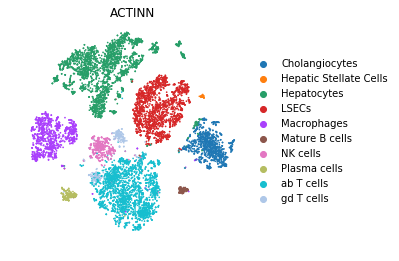

In [77]:
sc.pl.tsne(ad, color=['ACTINN'], ncols=3, frameon=False, hspace=0.1, wspace=0, save='_Aizarani_colorbar1.pdf')

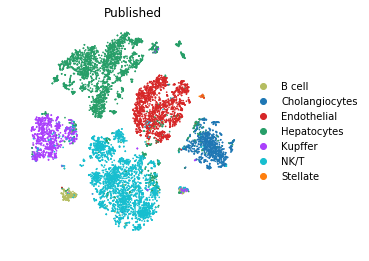

In [78]:
sc.pl.tsne(ad, color=['Published'], ncols=3, frameon=False, hspace=0.1, wspace=0, save='_Aizarani_colorbar2.pdf')

In [88]:
sc.pl.tsne(ad, color=['SCCAF'], ncols=3, frameon=False, hspace=0.1, wspace=0, save='_Aizarani_colorbar3.pdf')

In [87]:
sc.pl.tsne(ad, color=['SCCAF','ACTINN'])

In [82]:
ad.obs['SCCAF'] = ad.obs['L1_result']

In [12]:
ad.obs['singleCellNet'] = ad.obs['singleCellNet'].cat.reorder_categories(['Cholangiocytes', 'Hepatic Stellate Cells',
       'Hepatocytes', 'LSECs', 'Macrophages', 'Mature B cells', 'NK cells',
       'Plasma cells', 'ab T cells', 'gd T cells', 'rand', 'Erythroid cells', ])

In [16]:
ad.obs['moana'] = ad.obs['moana'].cat.reorder_categories(['Cholangiocytes', 'Hepatic Stellate Cells',
       'Hepatocytes', 'LSECs', 'Macrophages', 'Mature B cells', 'NK cells',
       'Plasma cells', 'ab T cells', 'gd T cells','Erythroid cells',])

In [ ]:
ad.obs['scClassify'] = ad.obs['scClassify'].cat.reorder_categories(['Cholangiocytes', 'Hepatic Stellate Cells',
       'Hepatocytes', 'LSECs', 'Macrophages', 'Mature B cells', 'NK cells',
       'Plasma cells', 'ab T cells', 'gd T cells','Erythroid cells',])

In [20]:
ii = []
for i in ad.obs['scClassify'].tolist():
    if i.find('_')>0:
        ii.append("mix")
    else:
        ii.append(i)
ad.obs['scClassify'] = ii

In [25]:
ad.obs['CHETAH'] = ad.obs['CHETAH'].cat.reorder_categories(['Cholangiocytes', 'Hepatic Stellate Cells', 'Hepatocytes', 'LSECs',
       'Macrophages', 'Mature B cells', 'NK cells', 'Plasma cells',
       'ab T cells', 'gd T cells','Unassigned', 'Node1', 'Node3', 'Node4',
       'Node5', 'Node6', 'Node7', 'Node8', 'Node9', ])

In [86]:
ad.uns['SCCAF_colors'] = [default_20[8],default_20[2],default_20[4],default_20[3],default_20[0],default_20[6],\
                         default_20[7],default_20[5],default_20[9],default_20[1]]

In [33]:
ad.uns['cell_colors'] = [default_20[7],default_20[0],default_20[3],default_20[2],default_20[4],default_20[8],\
                         default_20[1],default_20[6]]

In [3]:
from sklearn.metrics.cluster import adjusted_rand_score
vals = []
svals = []
for id in ['cell','SCCAF','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify','moana']:
    vals.append(adjusted_rand_score(ad.obs['cell'],ad.obs[id]))
    svals.append(adjusted_rand_score(ad.obs['SCCAF'],ad.obs[id]))

df = pd.DataFrame({'Published':vals,'SCCAF':svals})

df.index = ['Published','SCCAF','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify','moana']

In [5]:
figsize(5,5)
plt.plot(np.arange(df.shape[0]),df['Published'],'o-',c=default_20[0], label='Published')
plt.plot(np.arange(df.shape[0]),df['SCCAF'],'o-',c=default_20[1],label='SCCAF')
plt.xticks(np.arange(df.shape[0]), df.index, rotation=90)
plt.yticks([0,0.2,0.4,0.6,0.8,1])
plt.xlabel('Annotation methods', size=18)
plt.ylabel("Adjusted Rand Index", size=18)
plt.legend()
plt.savefig("ARI_Aizarani.pdf")

In [99]:
ls ../reference/running_history/*Aizarani2019Liver*.time

../reference/running_history/MacParland2018Liver_Aizarani2019Liver_ACTINN.time
../reference/running_history/MacParland2018Liver_Aizarani2019Liver_CHETAH.time
../reference/running_history/MacParland2018Liver_Aizarani2019Liver_LogisticRegression.time
../reference/running_history/MacParland2018Liver_Aizarani2019Liver_moana.time
../reference/running_history/MacParland2018Liver_Aizarani2019Liver_scClassify.time
../reference/running_history/MacParland2018Liver_Aizarani2019Liver_singleCellNet.time
../reference/running_history/MacParland2018Liver_Aizarani2019Liver_SingleR.time


In [108]:
tt = [357,7.7, 303.5, 41.5, 69.6, 106.5, 329.3, 153.4]

In [109]:
dt = pd.DataFrame({'time':tt}, index = ['SCCAF','LogisticRegression','ACTINN',\
                     'singleCellNet','CHETAH','SingleR',\
                     'scClassify','moana'])

In [110]:
dt

time
SCCAF               357.0
LogisticRegression    7.7
ACTINN              303.5
singleCellNet        41.5
CHETAH               69.6
SingleR             106.5
scClassify          329.3
moana               153.4

# End